# MATH 210 Introduction to Mathematical Computing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

## `odeint`

The function `scipy.odeint` is the general numerical differential equation solver in SciPy. Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). The input is `f`, `y0` and `t` where:

* `f` is the right side of a first order differential equation $y' = f(y,t)$ (note that $y$ is listed first and then $t$)
* `y0` is the initial value $y(t_0) = y_0$
* `t` is an array of $t$ values and `t[0]` is $t_0$

The function returns a NumPy array `y` of approximations $y_n \approx y(t_n)$.

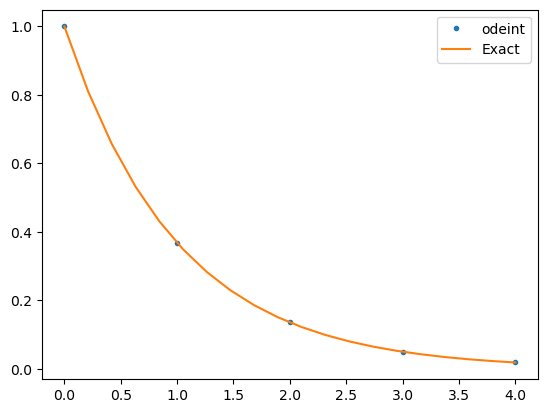

In [4]:
f = lambda y,t: -y
y0 = 1; t0 = 0; tf = 4;

# odeint solution
t = np.linspace(t0,tf,5)
y = spi.odeint(f,y0,t)
plt.plot(t,y,'.',label='odeint')

# exact solution
T = np.linspace(t0,tf,20)
Y = np.exp(-T)
plt.plot(T,Y,label='Exact')

plt.legend()
plt.show()

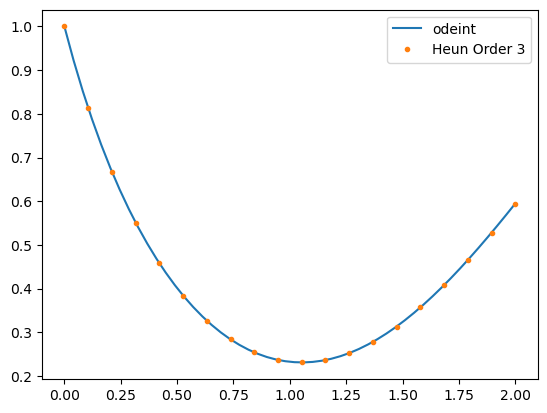

In [6]:
f = lambda y,t: -y**2 + t - 1
y0 = 1; t0 = 0; tf = 2;

# odeint solution
t = np.linspace(t0,tf,50)
y = spi.odeint(f,y0,t)
plt.plot(t,y,label='odeint')

# order 3 solution
def odeHeun3(f,y0,t):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(y[n],t[n])
        k2 = f(y[n] + k1*h/3,t[n] + h/3)
        k3 = f(y[n] + k2*2*h/3,t[n] + 2*h/3)
        y[n+1] = y[n] + (1/4*k1 + 3/4*k3)*h
    return y

T = np.linspace(t0,tf,20)
Y = odeHeun3(f,y0,T)
plt.plot(T,Y,'.',label='Heun Order 3')

plt.legend()
plt.show()